In [77]:
for i ∈ 1:10
    println(rand())
end

0.899344935251687
0.4897351655619586
0.5073081791296637
0.9587762494947011
0.8884980630564565
0.772533918616635
0.5410053865373317
0.9414407231487313
0.05831866129400032
0.10547596116834512


In [81]:
# Let y represent heads
# Let z represent tails

list = []

y_count = []
z_count = []

y = 0
z = 0

for i ∈ 1:10
    x = rand()
    
    println(x)
    if x > 0.5
        y += 1
        append!(z_count,z)
        z = 0
        append!(list,'H')
    else
        z += 1
        append!(y_count,y)
        y = 0
        append!(list,'T')
    end
end

#add the last set of repeats
if y > 0
    append!(y_count,y)
end

if z > 0
    append!(z_count,z)
end

max_y = maximum(y_count)
max_z = maximum(z_count)

println()

println(list)

println()
println("Largest Heads Count "*string(max_y))
println(y_count)

println()
println("Largest Tails Count "*string(max_z))
println(z_count)

println()
println(maximum([max_y,max_z]))

0.6612613798120677
0.3678216268999902
0.9624275020363874
0.3654603824663071
0.4738276641353102
0.9860362728717758
0.4635178957114957
0.3694438008845853
0.7694088231046147
0.1409254790628115

Any['H', 'T', 'H', 'T', 'T', 'H', 'T', 'T', 'H', 'T']

Largest Heads Count 1
Any[1, 1, 0, 1, 0, 1]

Largest Tails Count 2
Any[0, 1, 2, 2, 1]

2


In [256]:
using Statistics

count_total = []
for i ∈ 1:100
    count = 0
    for j ∈ 1:1000
        x = rand()
        if x > 0.5
            count += 1
        end
    end
    append!(count_total,count)
end

σ = sqrt( sum(  (count_total .- mean(count_total  )).^2 ) / (100-1)    )
    
println(string(count_total)*" average number of heads "*string(mean(count_total)))

println()

println("Seems to be generating random numbers as we would expect. Sample standard deviation "*string(σ)*".")

Any[494, 514, 506, 485, 474, 520, 494, 507, 503, 510, 510, 502, 507, 526, 506, 506, 499, 510, 497, 498, 477, 497, 491, 510, 500, 505, 490, 504, 506, 480, 490, 508, 501, 495, 526, 531, 516, 503, 499, 476, 518, 515, 508, 499, 508, 492, 498, 501, 494, 500, 524, 503, 512, 487, 514, 488, 526, 514, 492, 502, 474, 499, 511, 511, 503, 480, 536, 457, 474, 497, 505, 505, 516, 465, 491, 486, 458, 492, 493, 507, 517, 497, 533, 518, 473, 501, 496, 497, 507, 490, 519, 509, 501, 519, 502, 487, 521, 505, 508, 507] average number of heads 501.35

Seems to be generating random numbers as we would expect. Sample standard deviation 15.1039328613043.


In [259]:
t = [2 2 5 7]
# https://www.khanacademy.org/math/statistics-probability/summarizing-quantitative-data/
#variance-standard-deviation-sample/a/population-and-sample-standard-deviation-review
#checking if we have the standard deviation formula on lock

#Expected result is approximate 2.45 or sqrt(6)

σ = sqrt( sum(  (t .- mean(t  )).^2 ) / (4-1)    )
println(σ)
println(sqrt(6))

2.449489742783178
2.449489742783178


In [267]:
#add function showing the full details of what's going on
#We want to only have the the maximum number of repeats so only maximum([max_y,max_z]) is required

#p is the probability of heads 

function coinflip_full_info(n,r,p)
    
    
    max_repeat = []
    coin_set = []
    head_repeat = []
    
    for i ∈ 1:r

        y_count = []
        z_count = []
        
        list = []


        y = 0
        z = 0

        for j ∈ 1:n
            x = rand()
            if x > 1-p
                y += 1
                append!(z_count,z)
                z = 0
                append!(list,'H')
            else
                z += 1
                append!(y_count,y)
                y = 0
                append!(list,'T')
            end
        
        end
        
        if y > 0
            append!(y_count,y)
        end

        if z > 0
            append!(z_count,z)
        end
        
        
        max_y = maximum(y_count)
        max_z = maximum(z_count)
        
        append!(head_repeat,max_y)
        
        append!(max_repeat,maximum([max_y,max_z]))
        
            
        append!(coin_set,list)
        
        println(string(list)*" max number of repeats is "*string(max_repeat[i]))


        
        
    end
    
    
    μₘ = mean(max_repeat)
    σₘ = sqrt( sum(  (max_repeat .- μₘ).^2 ) / (r-1)    )
    μₕ = mean(head_repeat)
    σₕ = sqrt( sum(  (head_repeat .- μₕ).^2 ) / (r-1)    )
    
    println()
    
    println("Out of "*string(r)*" repeats of "*string(n)*
    " coin flips whereby the chance of a head was "*string(100*p)*
    "%, maximum number of repeats this time was found to be "*string(maximum(max_repeat))*
    " and average number of maximum repeats this time was found to be "*string(μₘ)*
    ". Sample standard deviation for this result is "*string(σₘ)*".")
    
    println()
    
    println("Hence, we would expect the result 68% of time to be between "*
    string(round(μₘ-σₘ,digits = 3))*" and "*string(round(μₘ+σₘ,digits = 3))*" and 95% of the time between "*
    string(round(μₘ-2*σₘ,digits = 3))*" and "*string(round(μₘ+2*σₘ,digits = 3))*"."
)
    
    println([μₘ σₘ])
    
    println()
    
    println("Maximum repeat of heads this time was found to be "*string(maximum(head_repeat))*
    " and average number of maximum head repeats this time was found to be "*string(μₕ)*
    ". Sample standard deviation for this result is "*string(σₕ)*".")
    
    println()
    
    println("Hence, we would expect the result 68% of time to be between "*
    string(round(μₕ-σₕ,digits = 3))*" and "*string(round(μₕ+σₕ,digits = 3))*" and 95% of the time between "*
    string(round(μₕ-2*σₕ,digits = 3))*" and "*string(round(μₕ+2*σₕ,digits = 3))*"."
)
    
    println([μₕ σₕ])
    
    
    return maximum(max_repeat),μₘ, maximum(head_repeat), μₕ, σₘ, σₕ
    
end

coinflip_full_info (generic function with 2 methods)

In [268]:
#10 coin flips repeated 50 times
coinflip_full_info(10,50,0.5)


Any['H', 'H', 'H', 'H', 'H', 'H', 'T', 'H', 'T', 'T'] max number of repeats is 6
Any['H', 'T', 'T', 'T', 'H', 'T', 'H', 'T', 'H', 'T'] max number of repeats is 3
Any['T', 'H', 'T', 'T', 'H', 'T', 'H', 'H', 'T', 'H'] max number of repeats is 2
Any['H', 'H', 'T', 'H', 'H', 'H', 'H', 'H', 'H', 'H'] max number of repeats is 7
Any['H', 'H', 'H', 'T', 'H', 'T', 'T', 'T', 'H', 'T'] max number of repeats is 3
Any['H', 'H', 'H', 'H', 'H', 'T', 'H', 'T', 'H', 'H'] max number of repeats is 5
Any['T', 'H', 'T', 'H', 'T', 'H', 'T', 'T', 'H', 'T'] max number of repeats is 2
Any['H', 'H', 'T', 'T', 'H', 'T', 'H', 'H', 'H', 'H'] max number of repeats is 4
Any['T', 'T', 'T', 'H', 'H', 'H', 'H', 'H', 'T', 'H'] max number of repeats is 5
Any['T', 'T', 'T', 'T', 'T', 'H', 'H', 'T', 'H', 'H'] max number of repeats is 5
Any['T', 'H', 'T', 'H', 'H', 'T', 'T', 'T', 'T', 'T'] max number of repeats is 5
Any['T', 'T', 'T', 'H', 'T', 'T', 'T', 'H', 'T', 'H'] max number of repeats is 3
Any['T', 'H', 'H', 'H', 'H',

(7, 3.84, 7, 3.06, 1.2674898864467905, 1.4201178450669336)

In [269]:
function coinflip(n,r,p)
    
    max_repeat = []
    head_repeat = []
    
    for i ∈ 1:r

        y_count = []
        z_count = []
        

        y = 0
        z = 0

        for j ∈ 1:n
            x = rand()
            if x > 1-p
                y += 1
                append!(z_count,z)
                z = 0
            else
                z += 1
                append!(y_count,y)
                y = 0
            end
        
        end
        
        if y > 0
            append!(y_count,y)
        end

        if z > 0
            append!(z_count,z)
        end
        
        
        max_y = maximum(y_count)
        max_z = maximum(z_count)
        
        append!(head_repeat,max_y)
        
        append!(max_repeat,maximum([max_y,max_z]))        
        
    end
    
    μₘ = mean(max_repeat)
    σₘ = sqrt( sum(  (max_repeat .- μₘ).^2 ) / (r-1)    )
    μₕ = mean(head_repeat)
    σₕ = sqrt( sum(  (head_repeat .- μₕ).^2 ) / (r-1)    )
    
    println()
    
    println("Out of "*string(r)*" repeats of "*string(n)*
    " coin flips whereby the chance of a head was "*string(100*p)*
    "%, maximum number of repeats this time was found to be "*string(maximum(max_repeat))*
    " and average number of maximum repeats this time was found to be "*string(μₘ)*
    ". Sample standard deviation for this result is "*string(σₘ)*".")
    
    println()
    
    println("Hence, we would expect the result 68% of time to be between "*
    string(round(μₘ-σₘ,digits = 3))*" and "*string(round(μₘ+σₘ,digits = 3))*" and 95% of the time between "*
    string(round(μₘ-2*σₘ,digits = 3))*" and "*string(round(μₘ+2*σₘ,digits = 3))*"."
)
    
    println([μₘ σₘ])

    
    println()
    
    println("Maximum repeat of heads this time was found to be "*string(maximum(head_repeat))*
    " and average number of maximum head repeats this time was found to be "*string(μₕ)*
    ". Sample standard deviation for this result is "*string(σₕ)*".")
    
    println()
    
    println("Hence, we would expect the result 68% of time to be between "*
    string(round(μₕ-σₕ,digits = 3))*" and "*string(round(μₕ+σₕ,digits = 3))*" and 95% of the time between "*
    string(round(μₕ-2*σₕ,digits = 3))*" and "*string(round(μₕ+2*σₕ,digits = 3))*"."
)
    
    println([μₕ σₕ])

    
    return max_repeat,maximum(max_repeat),μₘ, maximum(head_repeat), μₕ, σₘ, σₕ
    
end

coinflip (generic function with 2 methods)

In [270]:
coinflip(10,50,0.5)


Out of 50 repeats of 10 coin flips whereby the chance of a head was 50.0%, maximum number of repeats this time was found to be 8 and average number of maximum repeats this time was found to be 3.74. Sample standard deviation for this result is 1.4400963686574617.

Hence, we would expect the result 68% of time to be between 2.3 and 5.18 and 95% of the time between 0.86 and 6.62.
[3.74 1.4400963686574617]

Maximum repeat of heads this time was found to be 8 and average number of maximum head repeats this time was found to be 2.78. Sample standard deviation for this result is 1.607253964413356.

Hence, we would expect the result 68% of time to be between 1.173 and 4.387 and 95% of the time between -0.435 and 5.995.
[2.78 1.607253964413356]


(Any[4, 3, 5, 3, 2, 4, 6, 4, 3, 3  …  3, 3, 3, 5, 4, 4, 3, 2, 4, 8], 8, 3.74, 8, 2.78, 1.4400963686574617, 1.607253964413356)

In [271]:
coinflip(30000,1000,0.5)


Out of 1000 repeats of 30000 coin flips whereby the chance of a head was 50.0%, maximum number of repeats this time was found to be 26 and average number of maximum repeats this time was found to be 15.125. Sample standard deviation for this result is 1.8206289269616942.

Hence, we would expect the result 68% of time to be between 13.304 and 16.946 and 95% of the time between 11.484 and 18.766.
[15.125 1.8206289269616942]

Maximum repeat of heads this time was found to be 23 and average number of maximum head repeats this time was found to be 14.229. Sample standard deviation for this result is 1.794374202550509.

Hence, we would expect the result 68% of time to be between 12.435 and 16.023 and 95% of the time between 10.64 and 17.818.
[14.229 1.794374202550509]


(Any[14, 16, 16, 12, 14, 13, 15, 16, 14, 18  …  15, 16, 14, 14, 15, 14, 19, 18, 14, 17], 26, 15.125, 23, 14.229, 1.8206289269616942, 1.794374202550509)

In [275]:
function coinflip_result_only(n,r,p)
    
    max_repeat = []
    head_repeat = []
    
    for i ∈ 1:r

        y_count = []
        z_count = []
        

        y = 0
        z = 0

        for j ∈ 1:n
            x = rand()
            if x > 1-p
                y += 1
                append!(z_count,z)
                z = 0
            else
                z += 1
                append!(y_count,y)
                y = 0
            end
        
        end
        
        if y > 0
            append!(y_count,y)
        end

        if z > 0
            append!(z_count,z)
        end
        
        
        max_y = maximum(y_count)
        max_z = maximum(z_count)
        
        append!(head_repeat,max_y)
        
        append!(max_repeat,maximum([max_y,max_z]))        
        
    end
    
    
    μₘ = mean(max_repeat)
    σₘ = sqrt( sum(  (max_repeat .- μₘ).^2 ) / (r-1)    )
    μₕ = mean(head_repeat)
    σₕ = sqrt( sum(  (head_repeat .- μₕ).^2 ) / (r-1)    )
    
    return maximum(max_repeat),μₘ, maximum(head_repeat), μₕ, σₘ, σₕ
    
end

coinflip_result_only (generic function with 1 method)

In [293]:
using Plots

l = 56 #increase l for more datapoints between 50% and 100% chance of rolling heads
n = 30000 #number of throws
r = 1000 #number of repeats

#only go up to 95% because it ruins the perspective of graph

x = range(0.4,0.95,length = l)
maximum_repeats = []
μₘ = []
max_head_repeats = []
μₕ = []
σₘ = []
σₕ = []


for i ∈ 1:length(x)
    y,z,w,v,o,p = coinflip_result_only(n,r,x[i])
    append!(maximum_repeats,y)
    append!(μₘ,z)
    append!(max_head_repeats,w)
    append!(μₕ,v)
    append!(σₘ,o)
    append!(σₕ,p)
end

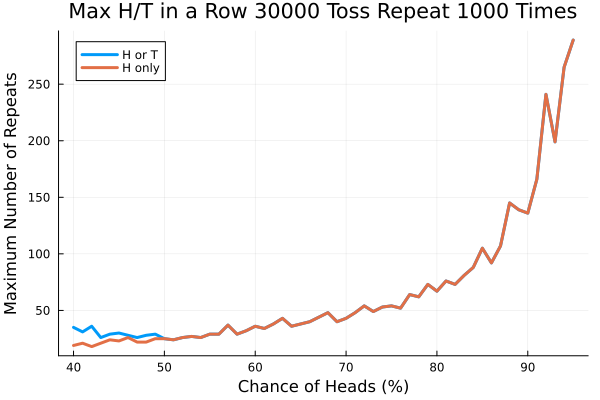

In [316]:
plot(100*x,[maximum_repeats max_head_repeats],label = ["H or T" "H only"],linewidth = 3) 
title!("Max H/T in a Row "*string(n)*" Toss Repeat "*string(r)* " Times")
xlabel!("Chance of Heads (%)")
ylabel!("Maximum Number of Repeats")


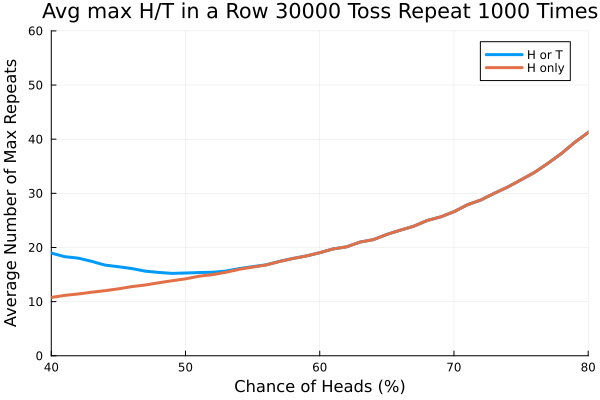

In [328]:
plot(100*x,[μₘ μₕ],label = ["H or T" "H only"],linewidth = 3) 
title!("Avg max H/T in a Row "*string(n)*" Toss Repeat "*string(r)* " Times")
xlabel!("Chance of Heads (%)")
ylabel!("Average Number of Max Repeats")
xlims!(40,80)
ylims!(0,60)

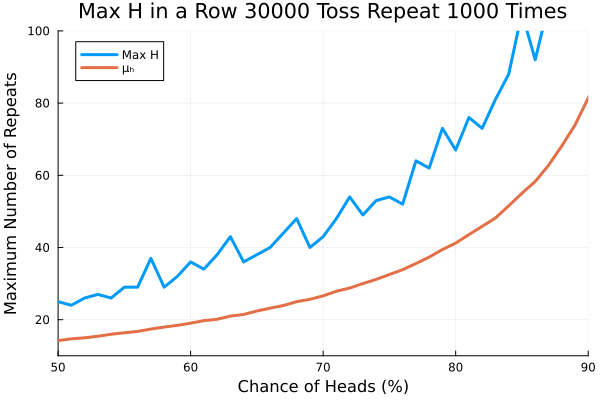

In [326]:
plot(100*x,[max_head_repeats μₕ],
label = ["Max H" "μₕ"],linewidth = 3) 
title!("Max H in a Row "*string(n)*" Toss Repeat "*string(r)* " Times")
xlabel!("Chance of Heads (%)")
ylabel!("Maximum Number of Repeats")
xlims!(50,90)
ylims!(10,100)


In [325]:
two_σₕ_left = μₕ-2*σₕ
two_σₕ_right = μₕ+2*σₕ
print()

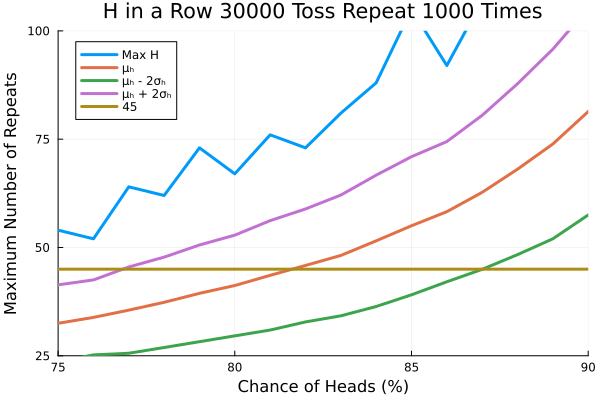

In [321]:
plot(100*x,[max_head_repeats μₕ],label = ["Max H" "μₕ"],linewidth = 3) 
plot!(100*x, [two_σₕ_left two_σₕ_right], label = ["μₕ - 2σₕ" "μₕ + 2σₕ"],linewidth = 3) 
plot!(100*x,range(45,45,length = length(x)), label = "45",linewidth = 3) 

title!("H in a Row "*string(n)*" Toss Repeat "*string(r)* " Times")
xlabel!("Chance of Heads (%)")
ylabel!("Maximum Number of Repeats")
xlims!(50,90)
ylims!(25,100)


In [323]:
for i ∈ 1:length(x)
    if avg_max_head_repeats[i] > 40
        println([100*x[i] avg_max_head_repeats[i]])
    end
end

[80.0 41.16]
[81.0 43.283]
[82.0 45.859]
[83.0 48.323]
[84.0 51.714]
[85.0 54.479]
[86.0 58.787]
[87.0 62.539]
[88.0 67.573]
[89.0 74.617]
[90.0 80.954]
[91.0 89.709]
[92.0 99.886]
[93.0 112.773]
[94.0 129.881]
[95.0 153.195]
